# Import Libraries

In [2]:
import os,shutil

# Create Directories for Small Data Set

In [5]:
#original_dataset_dir = '/Users/shruthiravi/Documents/Shruthi 9th grade/SkinLesionsSF18/cats_dogs/data_set/train'
base_dir = '/Users/shruthiravi/Documents/rsi_2020/data'

# Verify Image Counts

In [9]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shruthiravi/Documents/rsi_2020/data/train'

In [12]:
validate_dir = os.path.join(base_dir, 'validate')
os.mkdir(validate_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shruthiravi/Documents/rsi_2020/data/validate'

In [13]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shruthiravi/Documents/rsi_2020/data/test'

In [15]:
train_mask_dir = os.path.join(train_dir, 'mask')
os.mkdir(train_mask_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shruthiravi/Documents/rsi_2020/data/train/mask'

In [3]:
print('total training tubs images:', len(os.listdir(train_tubs_dir)))

NameError: name 'train_tubs_dir' is not defined

In [14]:
print('total training showers images:', len(os.listdir(train_showers_dir)))

total training showers images: 55


In [15]:
print('total validation tubs images:', len(os.listdir(validation_tubs_dir)))

total validation tubs images: 9


In [16]:
print('total validation shower images:', len(os.listdir(validation_showers_dir)))

total validation shower images: 4


In [17]:
print('total test cat images:', len(os.listdir(test_tubs_dir)))

total test tubs images: 8


In [18]:
print('total test shower images:', len(os.listdir(test_showers_dir)))

total test shower images: 4


# Data Preprocessing: Create Image Batch Generators

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 142 images belonging to 2 classes.


In [22]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 12 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
data_batch.shape

(20, 150, 150, 3)

In [25]:
labels_batch[1]

1.0

# Define the Model

In [26]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Configuring model for training

In [28]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

# Fitting model using Batch Generator

In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 161s 2s/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.3909 - val_acc: 0.8333
Epoch 2/20
100/100 [==============================] - 152s 2s/step - loss: 0.0101 - acc: 0.9975 - val_loss: 1.0660 - val_acc: 0.8333
Epoch 3/20
100/100 [==============================] - 170s 2s/step - loss: 1.6303e-05 - acc: 1.0000 - val_loss: 0.4950 - val_acc: 0.8333
Epoch 4/20
100/100 [==============================] - 147s 1s/step - loss: 5.1214e-04 - acc: 0.9995 - val_loss: 0.4730 - val_acc: 0.8333
Epoch 5/20
100/100 [==============================] - 133s 1s/step - loss: 1.6478e-06 - acc: 1.0000 - val_loss: 0.3487 - val_acc: 0.9167
Epoch 6/20
100/100 [==============================] - 130s 1s/step - loss: 6.2720e-04 - acc: 0.9995 - val_loss: 0.6837 - val_acc: 0.8333
Epoch 7/20
100/100 [==============================] - 143s 1s/step - loss: 7.4152e-07 - acc: 1.0000 - val_loss: 0.5190 - val_acc: 0.9167
Epoch 8/20
100/100 [=============================

In [31]:
model.save('tubs_and_showers_1.h5')

# Making a graph

In [32]:
import matplotlib.pyplot as plt

In [33]:
history.history

{'acc': [0.99943946174976539,
  0.99716874292185731,
  1.0,
  0.99943374844936661,
  1.0,
  0.99943946174976539,
  1.0,
  0.99943374844936661,
  1.0,
  1.0,
  1.0,
  1.0,
  0.99943946174976539,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.001712522453820883,
  0.011410525756793383,
  1.3625023124091749e-05,
  0.00057781405243636673,
  1.8005054030452817e-06,
  0.00070213162050833627,
  7.668082151548182e-07,
  0.0044962150201699374,
  2.7768516768376288e-06,
  1.6892971615875988e-07,
  0.00035049488798374315,
  2.6208559742974354e-07,
  0.00095494193209800181,
  2.7174669556286983e-06,
  1.6248702707983543e-07,
  1.1190122514702405e-07,
  1.11919698700553e-07,
  1.1188890748506378e-07,
  1.1186586055883544e-07,
  1.1194329479185234e-07],
 'val_acc': [0.83333331346511841,
  0.83333331346511841,
  0.83333331346511841,
  0.83333331346511841,
  0.91666668653488159,
  0.83333331346511841,
  0.91666668653488159,
  0.83333331346511841,
  0.83333331346511841,
  0.9166666865348

# Data Augmentation

In [34]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [35]:
from keras.preprocessing import image

In [36]:
fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

NameError: name 'train_cats_dir' is not defined

In [37]:
img_path = fnames[3]

NameError: name 'fnames' is not defined

In [40]:
img = image.load_img(img_path, target_size=(150,150))

In [42]:
x = image.img_to_array(img)

In [43]:
x = x.reshape((1,) + x.shape)

In [47]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0 :
        break

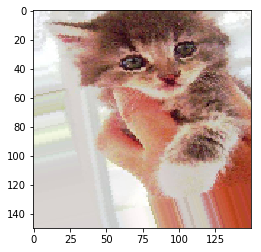

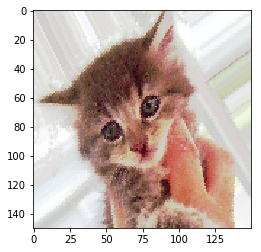

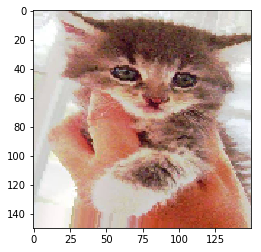

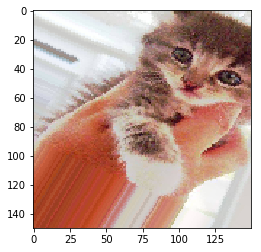

In [48]:
plt.show()

# Adding Dropout

In [50]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [51]:
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=40,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=-.2,
    horizontal_flip=True,)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

NameError: name 'ImageDataGenerator' is not defined

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [55]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [56]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 156s 2s/step - loss: 0.6944 - acc: 0.5065 - val_loss: 0.6828 - val_acc: 0.5030
Epoch 2/20
100/100 [==============================] - 2404s 24s/step - loss: 0.6800 - acc: 0.5565 - val_loss: 0.6573 - val_acc: 0.5840
Epoch 3/20
100/100 [==============================] - 191s 2s/step - loss: 0.6693 - acc: 0.5565 - val_loss: 0.6706 - val_acc: 0.5830
Epoch 4/20
100/100 [==============================] - 176s 2s/step - loss: 0.6498 - acc: 0.6020 - val_loss: 0.6285 - val_acc: 0.6480
Epoch 5/20
100/100 [==============================] - 165s 2s/step - loss: 0.6290 - acc: 0.6320 - val_loss: 0.6132 - val_acc: 0.6590
Epoch 6/20
100/100 [==============================] - 162s 2s/step - loss: 0.6221 - acc: 0.6610 - val_loss: 0.6046 - val_acc: 0.6680
Epoch 7/20
100/100 [==============================] - 184s 2s/step - loss: 0.6070 - acc: 0.6620 - val_loss: 0.5878 - val_acc: 0.6880
Epoch 8/20
100/100 [==============================] - 170s 2s/step 

In [2]:
model.save('cats_and_dogs_2.h5')

NameError: name 'model' is not defined

# Importing VGG16 Model

In [5]:
from keras.applications import VGG16

Using TensorFlow backend.


In [6]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58892288/58889256 [==============================] - 6s 0us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________